In [167]:
import numpy as np
import random 
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
import math
import csv
import seaborn as sns
# from fitter import Fitter, get_common_distributions, get_distributions

In [168]:
def normalize(data):
    result = data.copy()
    
    for col in data.columns:
        max_value = data[col].max()
        min_value = data[col].min()
        result[col] = (data[col] - min_value) / (max_value - min_value)
    return result

### **Data Preprocessing**

In [169]:
#@title Normilization
#reading data from data file
dataRaw= pd.read_csv("ce889_dataCollection_prev.csv",index_col=False)
#normilizing the data into the range of 0 to 1
normData=normalize(dataRaw)
#converting it into list
inputsNorm = normData.iloc[:, 0:2]
outputsNorm=normData.iloc[:, 2:4]
print(normData)
# normData.to_csv("file.csv", sep=',')

      200.4266105     307.1         0       0.1
0        0.674661  0.450976  0.356907  0.495101
1        0.674623  0.451163  0.348932  0.492026
2        0.674623  0.451536  0.340957  0.495101
3        0.674584  0.452095  0.332981  0.492026
4        0.674584  0.452841  0.325006  0.495101
...           ...       ...       ...       ...
8947     0.514102  0.059957  0.939759  0.629382
8948     0.512379  0.046515  0.947734  0.626306
8949     0.510695  0.032887  0.955709  0.623231
8950     0.509049  0.019072  0.963684  0.620156
8951     0.507442  0.005071  0.971660  0.617081

[8952 rows x 4 columns]


In [170]:
#checking null 0,or na values
dataRaw.isna().sum()

200.4266105    0
307.1          0
0              0
0.1            0
dtype: int64

In [171]:
dataRaw.info()
# da=inputsNorm.pop(0)
# print(da)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8952 entries, 0 to 8951
Data columns (total 4 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   200.4266105  8952 non-null   float64
 1   307.1        8952 non-null   float64
 2   0            8952 non-null   float64
 3   0.1          8952 non-null   float64
dtypes: float64(4)
memory usage: 279.9 KB


input 1


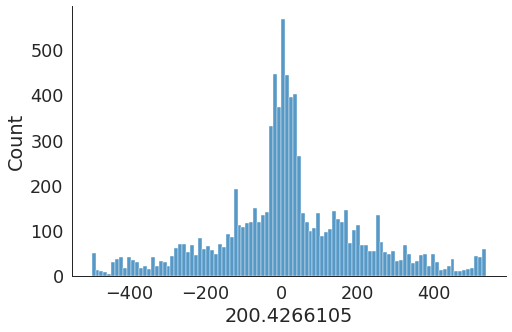

In [173]:
sns.set_style('white')
sns.set_context("paper", font_scale = 2)
sns.displot(data=dataRaw, x=dataRaw['200.4266105'], kind="hist", bins = 100, aspect = 1.5)
print("input 1")

input 2


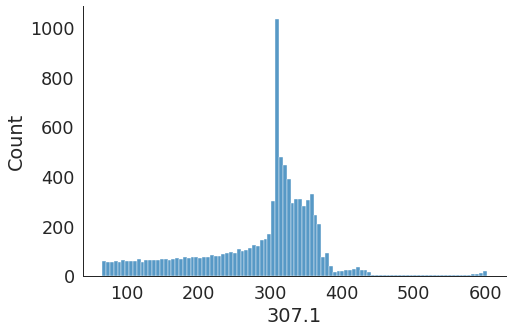

In [174]:
sns.set_style('white')
sns.set_context("paper", font_scale = 2)
sns.displot(data=dataRaw, x=dataRaw['307.1'], kind="hist", bins = 100, aspect = 1.5)
print("input 2")

output 1


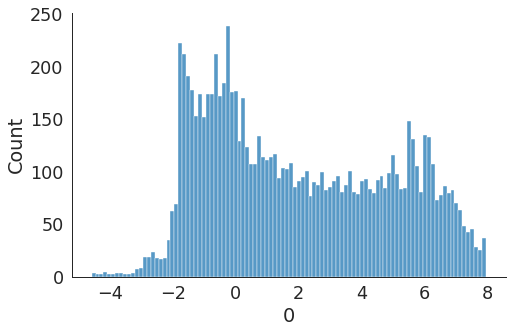

In [175]:
sns.set_style('white')
sns.set_context("paper", font_scale = 2)
sns.displot(data=dataRaw, x="0", kind="hist", bins = 100, aspect = 1.5)
print("output 1")

output 2


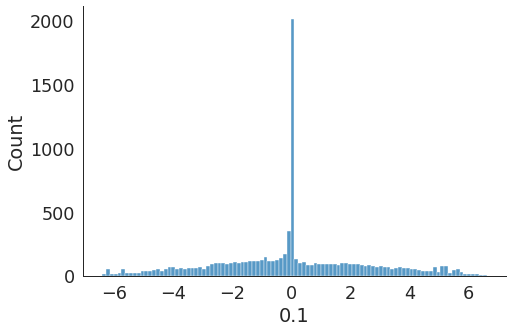

In [176]:
sns.set_style('white')
sns.set_context("paper", font_scale = 2)
sns.displot(data=dataRaw, x="0.1", kind="hist", bins = 100, aspect = 1.5)
print("output 2")

In [177]:
#@title Splitting data
#splitting the data with shuffle and random state
X_train, X_test, y_train, y_test = train_test_split(inputsNorm, outputsNorm,test_size=0.3, shuffle = True, random_state = 35)
inputsNormlist=X_train.values.tolist()
outputNormlist=y_train.values.tolist()
# print(inputsNormlist)

In [178]:
#@title Splitting data testing validation
#splitting the data with shuffle and random state
Xtest, XVal, Ytest, YVal = train_test_split(X_test, y_test,test_size=0.15, shuffle = True, random_state = 35)


### **Neural Network Class**

In [186]:
class NeuralNetwork():
    def __init__(self,numberOfNeurons):
      #initializing neural network values
        self.inputValue=None
        self.numberOfNeurons=numberOfNeurons
        self.currentweights = None
        self.previousWeights=None
        self.lmbda = 0.6
        self.eitha=0.9
        self.alpha=0.01
        self.deltaWeight=None
        self.deltaWeightPrev=None
        self.localGradientz=None
        
    #generate random  weights
    def generateWeight(self,rows,cols):
        weights=[]
        weights=np.random.random((rows,cols))
        biasWeight=np.random.random(cols)
        return weights,biasWeight
    #multiplying input into weights with bias
    def InputIntoWeight(self,weights,biasWeight,inputValue):
      #assigning weights 
        self.inputValue=inputValue
        self.currentweights=weights        
        inputWeightss=[]
        biasInput=[]
        biasInput=inputValue.copy()
        # inserting bias input in input value
        biasInput.insert(0,1)
        sums=0       
        #weights into input  
        for i in range(len(self.currentweights[1])):
            for j in range(len(inputValue)):
                sums+=inputValue[j]*self.currentweights[j][i]
            
            inputWeightss.append(sums)
            sums=0
        return inputWeightss,biasInput

    #activation function sigmoid
    def sig(self,x):
      #calculating sigmoid values
        sigmoidValues=[]
        for i in range(len(x)):
            sigmoidValues.append(round(1/(1 + np.exp(-(self.lmbda*x[i]))),6))
        return sigmoidValues
    
        
    
   #backward

    #error calculation
    def errorCalculation(self,output,desiredOutput):
        errorUpdate=[]
        for i in range(0,len(output)):
            errorUpdate.append(round((desiredOutput[i]-output[i]),6))
        return errorUpdate
    
    #local gradient for backwards 
    def localGradient(self,output,error,flagHiddenInput,localGradientsPrev,prevWeightsOfOutput):
        localGradients=[]
        sumOfWeight=0
        numcols = prevWeightsOfOutput
#       output to hidden layer check
        if flagHiddenInput==False:
            for i in range(0,len(output)):
                localGradients.append(self.lmbda*output[i]*(1-output[i])*error[i])               
            self.localGradientz=localGradients
#   hidden to input
        else:
            transpos=prevWeightsOfOutput.T
            sumofWeights=0
            lgIntoPrevWeights=[]
            #mulitplying previous weights with previous layer local gradients
            for i in range(len(prevWeightsOfOutput)):
                for j in range(len(localGradientsPrev)):
                    sumofWeights+=localGradientsPrev[j]*prevWeightsOfOutput[i][j]
                lgIntoPrevWeights.append(sumofWeights)
                sumofWeights=0
            #calculating local gradient 
            for i in range(len(output)):
                localGradients.append(self.lmbda*output[i]*(1-output[i])*lgIntoPrevWeights[i])
            self.localGradientz=localGradients   
        return localGradients
    
    
    #calculating delta weights
    def CalculatingDeltaWeight(self,localGradientLayer,activationLayer1,prevDeltaweight,firstIterate,alpha):
        numrows = len(self.currentweights)
        numcols = len(self.currentweights[1])
        deltaWeights=[]
        sumOfPrevAlpha=[]
        multiplyAlpha=0
    #delta weights for first iteration
        if firstIterate==True:
            for i in range(len(localGradientLayer)):
                    for j in range(len(activationLayer1)):
                        deltaWeights.append(self.eitha*localGradientLayer[i]*activationLayer1[j])
            # print("delta weights",deltaWeights)
            self.deltaWeight=deltaWeights
    #delta weights for second iteration with alpha 
        else:
            prevDeltaweight=np.array(prevDeltaweight).reshape(numrows, numcols)
            for i in range(len(prevDeltaweight)):
                for j in range(len(prevDeltaweight[1])):
                    sumOfPrevAlpha.append(alpha*prevDeltaweight[i][j])
            
            sumOfPrevAlphaArray =np.array(sumOfPrevAlpha).reshape(numrows, numcols)
            for i in range(len(localGradientLayer)):
                    for j in range(len(activationLayer1)):
                        deltaWeights.append(self.eitha*localGradientLayer[i]*activationLayer1[j]+sumOfPrevAlphaArray[j][i])
        self.deltaWeightPrev=self.deltaWeight
        self.deltaWeight=deltaWeights          
        return self.deltaWeight
    
    #updating the weights by adding delta weights and previous weights 
    def updateWeights(self,deltaWeights,biasweights,biasweightsLG,activationValues,output,lenactivationValues,hiddentoInput,lenInput):
        newWeights=[]
        biasWeights=[]
        rows=len(self.currentweights)
        cols=len(self.currentweights[1])
        
        biasWeights.append(biasweights+biasweightsLG)
        #reshaping delatweights and transposing
        deltaWeightsArray=np.array(deltaWeights).reshape(cols, rows)
        a=deltaWeightsArray.T

        # adding delta weights with current weights to get new weights
        newWeights=a+self.currentweights    
        self.previousWeights=self.currentweights
        self.currentweights=newWeights

        return self.currentweights,biasWeights
        

### Initializing Neural Network Architechture

In [187]:
numberOfNeurons=6
desiredOutput=outputNormlist.pop(0)
print(desiredOutput)
inputValue=inputsNormlist.pop(0)
print(inputValue)

[0.7008125296433649, 0.38364551137728015]
[0.4933359803954084, 0.31377182645345214]


In [188]:
#initializing neural network
inputToHiddenLayer=NeuralNetwork(numberOfNeurons)
hiddenToOutputLayer=NeuralNetwork(numberOfNeurons)
# initializng weights
mse=[]
weightsInputHidden,biasWeightInput=inputToHiddenLayer.generateWeight(len(inputValue),numberOfNeurons)
weightsHiddenOutput,biasWeightOutput=hiddenToOutputLayer.generateWeight(numberOfNeurons,len(desiredOutput))

In [189]:
#feed forward first iterate
  # input to hidden
inputWeights,biasInput1=inputToHiddenLayer.InputIntoWeight(weightsInputHidden,biasWeightInput,inputValue)
activationHidden=inputToHiddenLayer.sig(inputWeights)
    #hidden to output
hiddenWeights,biasHidden1=hiddenToOutputLayer.InputIntoWeight(weightsHiddenOutput,biasWeightOutput,activationHidden)
output=hiddenToOutputLayer.sig(hiddenWeights)
print("output",output)

output [0.738258, 0.711048]


In [190]:
#initializing lists
errorList=[]
outputError1=[]
outputError2=[]
avgError=[]
mseavg=[]
msey1=[]
msey2=[]
#backward
#error calculation 
error=hiddenToOutputLayer.errorCalculation(output,desiredOutput)
errorList.append(error)
    #calculating output to hidden
localGradients=hiddenToOutputLayer.localGradient(output,error,False,0,0)
deltaWeightsoutput=hiddenToOutputLayer.CalculatingDeltaWeight(localGradients,activationHidden,0,True,0.01)
hiddenToOutputLayer.updateWeights(deltaWeightsoutput,biasHidden1,biasHidden1,activationHidden,output,activationHidden,False,0)
    #calculating hidden to input
localGradientshidden=inputToHiddenLayer.localGradient(activationHidden,0,True,localGradients,hiddenToOutputLayer.previousWeights)
deltaWeightsHidden=inputToHiddenLayer.CalculatingDeltaWeight(localGradientshidden,inputValue,0,True,0.01)
weightsHiddenInput=inputToHiddenLayer.updateWeights(deltaWeightsHidden,biasInput1,biasInput1,activationHidden,output,activationHidden,True,inputValue)


In [191]:

print(inputToHiddenLayer.currentweights)
print(hiddenToOutputLayer.currentweights)

[[0.47008268 0.34790366 0.03573597 0.20478525 0.19434111 0.51425436]
 [0.03346158 0.6284778  0.45527321 0.58148132 0.62627012 0.57529847]]
[[ 0.51370668  0.73778942]
 [ 0.37256859 -0.00618487]
 [ 0.57620339  0.08229755]
 [ 0.82222794  0.50532492]
 [ 0.3526702   0.72927699]
 [ 0.52902843  0.58362104]]


In [192]:
def meanSquareError(error):
    sumMse=0
    for i in range(len(error)):
        sumMse+=(error[i]**2)
    mse=(1/len(error))*sumMse
    return mse

In [193]:
#training 
for i in range(180):
    for j in range(len(inputsNormlist)):
        #feedforward
#         input to hidden
        wxInputHidden,biasInput=inputToHiddenLayer.InputIntoWeight(inputToHiddenLayer.currentweights,biasWeightInput,inputsNormlist[j])
        activationHiddenLayer=inputToHiddenLayer.sig(wxInputHidden)
        
        #hidden to output
        wxHiddenOutput,biasHidden=hiddenToOutputLayer.InputIntoWeight(hiddenToOutputLayer.currentweights,biasWeightOutput,activationHiddenLayer)
        outputPredicted=hiddenToOutputLayer.sig(wxHiddenOutput)

        #error
        error=hiddenToOutputLayer.errorCalculation(outputPredicted,outputNormlist[j])
        errorList.append(error)
        avgError.append((sum(error))/2)
        outputError1.append(error[0])
        outputError2.append(error[1])
        
        #backward
#         output to hidden
        LGOutputHidden=hiddenToOutputLayer.localGradient(outputPredicted,error,False,0,0)
        deltaWeightsoutput=hiddenToOutputLayer.CalculatingDeltaWeight(LGOutputHidden,activationHiddenLayer,hiddenToOutputLayer.deltaWeightPrev,False,0.01)
        hiddenToOutputLayer.updateWeights(deltaWeightsoutput,biasHidden1,biasHidden1,activationHiddenLayer,outputPredicted,activationHiddenLayer,False,0)
        
        
        #hidden to input
        LGHiddenInput=inputToHiddenLayer.localGradient(activationHiddenLayer,0,True,LGOutputHidden,hiddenToOutputLayer.previousWeights)
        deltaWeightsHidden=inputToHiddenLayer.CalculatingDeltaWeight(LGHiddenInput,inputsNormlist[j],inputToHiddenLayer.deltaWeightPrev,False,0.01)
        inputToHiddenLayer.updateWeights(deltaWeightsHidden,biasInput1,biasInput1,activationHiddenLayer,0,activationHiddenLayer,True,inputsNormlist[j])
    mseavg.append(math.sqrt(meanSquareError(avgError)))
    msey1.append(math.sqrt(meanSquareError(outputError1)))
    msey2.append(math.sqrt(meanSquareError(outputError2)))
        

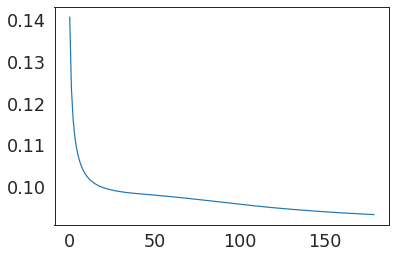

RSME 69 0.09736137840252962
RSME 79 0.09691834202909864
RSME 89 0.09645150965090836
RSME 99 0.09598510895796145
RSME 109 0.0955443953646874
RSME 119 0.09514232499984432
RSME 130 0.09474755688517739
RSME 149 0.09417063066229373
RSME 159 0.0939116342300541
RSME 169 0.0936780181308038
RSME 179 0.09346632899472665


In [194]:
#RMSE training
plt.plot(mseavg)
plt.show()
# print(len(mseavg))

print("RSME 69",mseavg[69])
print("RSME 79",mseavg[79])
print("RSME 89",mseavg[89])
print("RSME 99",mseavg[99])
print("RSME 109",mseavg[109])
print("RSME 119",mseavg[119])
print("RSME 130",mseavg[130])
print("RSME 149",mseavg[149])
print("RSME 159",mseavg[159])
print("RSME 169",mseavg[169])
print("RSME 179",mseavg[179])
# print("RSME 188 ",mseavg[189])
# print("RSME 199 ",mseavg[199])


In [162]:
print("input to hidden")
print(inputToHiddenLayer.currentweights)
print("hidden to output")
print(hiddenToOutputLayer.currentweights)

input to hidden
[[  0.10985284   7.7619416   -2.54147806 -14.1411045   -5.52683282
   -5.66009584]
 [  4.61431991  -0.6162896   -1.843548    -0.33102002  -3.07092385
   -4.69358649]]
hidden to output
[[-12.21359861  -9.1575221 ]
 [  6.6829733    9.7744087 ]
 [ 16.95247933   1.74109849]
 [ -4.48317781  20.97070821]
 [  3.83013875 -18.03046986]
 [ -2.26754452 -16.56487089]]


In [42]:
np.savetxt('weights_inputHidden.txt', inputToHiddenLayer.currentweights, fmt='%f')
np.savetxt('weights_hiddenToOutput.txt', hiddenToOutputLayer.currentweights, fmt='%f')

### Validation 

In [ ]:
inputsTestlist=X_test.values.tolist()
outputTestlist=y_test.values.tolist()

In [ ]:
# Validation
inputsNormlistVal=XVal.values.tolist()
outputNormlistVal=YVal.values.tolist()

mseavgs=[]
avgErrors=[]
def validation(inputsNormlistVal,outputNormlistVal):
  for i in range(150):
      for j in range(len(inputsNormlistVal)):
        # print(inputsNormlistVal[j])
        
          #feedforward
  #         input to hidden
        wxInputHidden,biasInput=inputToHiddenLayer.InputIntoWeight(inputToHiddenLayer.currentweights,biasWeightInput,inputsNormlistVal[j])
        activationHiddenLayer=inputToHiddenLayer.sig(wxInputHidden)
          
          #hidden to output
        wxHiddenOutput,biasHidden=hiddenToOutputLayer.InputIntoWeight(hiddenToOutputLayer.currentweights,biasWeightOutput,activationHiddenLayer)
        outputPredicted=hiddenToOutputLayer.sig(wxHiddenOutput)
          # print("output predicted",outputPredicted)

          #error
        error=hiddenToOutputLayer.errorCalculation(outputPredicted,outputNormlistVal[j])
        errorList.append(error)
        avgErrors.append((sum(error))/2)
        
          #backward
  #         output to hidden
        LGOutputHidden=hiddenToOutputLayer.localGradient(outputPredicted,error,False,0,0)
  #         print(hiddenToOutputLayer.deltaWeightPrev)
        deltaWeightsoutput=hiddenToOutputLayer.CalculatingDeltaWeight(LGOutputHidden,activationHiddenLayer,hiddenToOutputLayer.deltaWeightPrev,False,0.01)
        hiddenToOutputLayer.updateWeights(deltaWeightsoutput,biasHidden1,biasHidden1,activationHiddenLayer,outputPredicted,activationHiddenLayer,False,0)
          
          
          #hidden to input
        LGHiddenInput=inputToHiddenLayer.localGradient(activationHiddenLayer,0,True,LGOutputHidden,hiddenToOutputLayer.previousWeights)
        deltaWeightsHidden=inputToHiddenLayer.CalculatingDeltaWeight(LGHiddenInput,inputsNormlistVal[j],inputToHiddenLayer.deltaWeightPrev,False,0.01)
        inputToHiddenLayer.updateWeights(deltaWeightsHidden,biasInput1,biasInput1,activationHiddenLayer,0,activationHiddenLayer,True,inputsNormlistVal[j])
      mseavgs.append(math.sqrt(meanSquareError(avgErrors)))
      # print(mseavgs)
  return mseavgs
   

[0.6269592463882919, 0.5208851960064089]
[0.208057663043418, 0.46178166956351846]
[0.27313971291344097, 0.5130099810268158]
[0.675279534941218, 0.4687223002479983]
[0.5260556888480992, 0.3800674074928234]
[0.15063494671862854, 0.4511614313876928]
[0.5734239526737543, 0.4683253118359612]
[0.50271807810334, 0.06675196666023496]
[0.39953473061691264, 0.524002676633277]
[0.3673191757924531, 0.45004395243285944]
[0.5929720240375315, 0.5358178661059233]
[0.37117414567347656, 0.4544459629407402]
[0.5783749024691981, 0.4980745617463023]
[0.2069922660563531, 0.45041599123015413]
[0.4205454514387675, 0.4971539488028259]
[0.6165020400585528, 0.5323308079474465]
[0.834489845310876, 0.4509763206751345]
[0.2551311938954456, 0.540906647872645]
[0.4191073524025185, 0.5593924780554352]
[0.4985540502202665, 0.09081593077638936]
[0.45060858544578025, 0.42322630640308007]
[0.4720114257018271, 0.45507874094114464]
[0.8248140904510483, 0.4509998391046249]
[0.3012504589427115, 0.37271384657762646]
[0.4663579

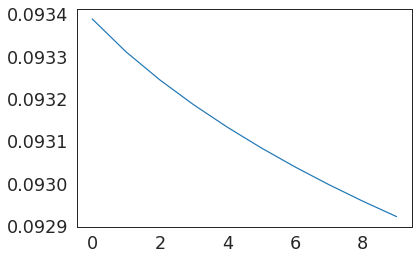

In [ ]:
mseavgss=validation(inputsNormlistVal,outputNormlistVal) 
plt.plot(mseavgss)
plt.show()

In [ ]:
# weightsInputHidden=inputToHiddenLayer.currentweights
# weightsHiddenOutput=hiddenToOutputLayer.currentweights
print(inputToHiddenLayer.currentweights)
print(hiddenToOutputLayer.currentweights)


[[0.80763293 0.47116996]
 [0.78406013 0.46474668]
 [0.43930801 0.48411322]
 [0.9054314  0.54405892]
 [0.06628012 0.14408131]
 [0.48850071 0.72208747]]


### Test

In [195]:
def InputIntoWeightTest(weights,inputValue):        
  inputWeightss=[]
  sums=0         
  for i in range(len(weights[1])):
    for j in range(len(inputValue)):
      sums+=inputValue[j]*weights[j][i]
    inputWeightss.append(sums)
    # print("input into weights",inputWeightss)
    sums=0
  return inputWeightss
def sigTest(x):
  lmbda=0.8
  sigmoidValues=[]
  for i in range(len(x)):
    sigmoidValues.append(round(1/(1 + np.exp(-(lmbda*x[i]))),6))
  return sigmoidValues

In [199]:
mseTest=[]
avgErrors=[]
inputsNormlistTest=Xtest.values.tolist()
outputNormlistTest=Ytest.values.tolist()
def testing(inputsNormlistTest,outputNormlistTest):
  for j in range(len(inputsNormlistTest)):
    #input to hidden
    wxInputHidden=InputIntoWeightTest(inputToHiddenLayer.currentweights,inputsNormlistTest[j])
    activationHiddenLayer=sigTest(wxInputHidden)
            #hidden to output
    wxHiddenOutput=InputIntoWeightTest(hiddenToOutputLayer.currentweights,activationHiddenLayer)
    #predict
    outputPredicted=sigTest(wxHiddenOutput)
    #error
    error1=output[0]-outputNormlistTest[j][0]
    error2=output[1]-outputNormlistTest[j][1]
    avgErrors.append((error1+error2)/2)
    mseTest.append(math.sqrt(meanSquareError(avgErrors)))
  return mseTest



In [200]:
testing(inputsNormlistTest,outputNormlistTest)

[0.3455983556465884,
 0.2841557696131637,
 0.26845757481249116,
 0.2349187226592953,
 0.2414872977398061,
 0.23097990927859754,
 0.2518593733405343,
 0.26277444707980196,
 0.2540515433161361,
 0.24363847892789267,
 0.25360343451525547,
 0.25744770789055393,
 0.2595686821683375,
 0.25013253809442243,
 0.24170036262962644,
 0.25061505889725255,
 0.25144059936904295,
 0.25312709778919046,
 0.25476910548078263,
 0.2559205328841581,
 0.2523908169417941,
 0.24925483641956492,
 0.24564981577023431,
 0.25255205662624103,
 0.24864351974931473,
 0.2493595692914828,
 0.25435273771991096,
 0.25484179847124183,
 0.2536146509969656,
 0.2499481575632414,
 0.24989671704808028,
 0.2552614031390805,
 0.2515307914086847,
 0.24842793079427922,
 0.24603062756462912,
 0.24445682760383344,
 0.24978553902412148,
 0.2482753044757155,
 0.24626297737102543,
 0.24352344206788873,
 0.24261454374867666,
 0.25159222456261005,
 0.2537456275731478,
 0.2527045565633604,
 0.2507039048223771,
 0.2488039102963818,
 0.2470

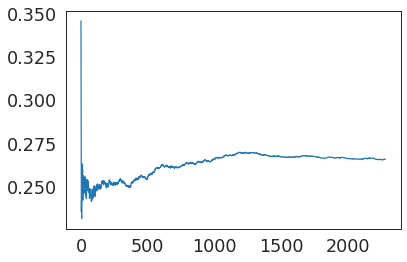

2283
0.2654266437989973


In [198]:
plt.plot(mseTest)
plt.show()
print(len(mseTest))
print(mseTest[2282])